<h1 align="center">Xtools</h1>
<h3 align="center">Written by <a href="mailto:oliver.lord@bristol.ac.uk">Oliver T Lord</a></h3> 
<h4 align="center"><a href="http://www.bristol.ac.uk/earthsciences/people/person/oliver-t-lord/overview.html">School of Earth Sciences, University of Bristol</h4>

Copyright 2018 Oliver Lord
 
This file is part of Xtools.
 
Xtools is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.
 
Xtools is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.
 
You should have received a copy of the GNU General Public License
along with Xtools.  If not, see <http://www.gnu.org/licenses/>.

<h2 align="left">TOOL 1: PV calculator</h2>

In [1]:
#%%capture
#!jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [2]:
import ipywidgets as widgets
import numpy as np
import sys

from ipywidgets import Layout, HBox, VBox
from IPython.core.display import display
from scipy.optimize import fsolve

global P_max, phase, EoS
P_max, V0, EoS, phase, ref = 200, 40, 1, 1, 1

def phases(phase,EoS,ref):
    global V0, K, Kp, a0, b0, c0
    if phase == 'MgSiO3 perovskite':
        #Data from: Tange et al. (2012) 10.1029/2011JB008988 and Tange et al. (2009) 10.1029/2008JB005891
        dropdown2.value, dropdown2.disabled = '3rd Order Birch-Murnaghan', True
        with dropdown3.hold_trait_notifications():
            dropdown3.options = ['Choose', 'Tange et al. (2012)']
        dropdown3.value, dropdown3.disabled = 'Tange et al. (2012)', True
        V0, K, Kp, a0, b0, c0 = 162.373, 258.4, 4.1, 4.7769, 4.9284, 6.8972
    if phase == 'MgCO3 magnesite':
        #Data from: Fiquet et al. (2002) American Mineralogist 87:1261-1265
        dropdown2.value, dropdown2.disabled = '3rd Order Birch-Murnaghan', True
        with dropdown3.hold_trait_notifications():
            dropdown3.options = ['Choose', 'Fiquet et al. (2002)']
        dropdown3.value, dropdown3.disabled = 'Fiquet et al. (2002)', True
        V0, K, Kp, a0, b0, c0 = 279.2, 108, 5, 4.6377, 4.6377, 15.007
    if phase == 'SiO2 stishovite':
        #Data from: Wang et al. (2012) 10.1029/2011JB009100
        with dropdown3.hold_trait_notifications():
            dropdown3.options = ['Choose', 'Wang et al. (2012)']
        dropdown3.value, dropdown3.disabled = 'Wang et al. (2012)', True
        dropdown2.disabled = False
        if EoS == '3rd Order Birch-Murnaghan':
            V0, K, Kp, a0, b0, c0 = 46.55, 294, 4.85, 4.66, 4.66, 2.8403
        if EoS == 'Vinet':
            V0, K, Kp, a0, b0, c0 = 46.55, 292, 5.01, 4.66, 4.66, 2.8403
    if phase == 'Pt':
        #Data from: Dorogokupets & Dewaele (2007) 10.1080/08957950701659700
        dropdown2.value, dropdown2.disabled = '3rd Order Birch-Murnaghan', True
        with dropdown3.hold_trait_notifications():
            dropdown3.options = ['Choose', 'Dorogokupets & Dewaele (2007)']
        dropdown3.value, dropdown3.disabled = 'Dorogokupets & Dewaele (2007)', True
        V0, K, Kp, a0, b0, c0 = 60.38, 277.3, 5.12, 3.9231, 3.9231, 3.9231
    if phase == 'Au':
        #Data from: Fei et al. (2012) 10.1073/pnas.0609013104
        with dropdown3.hold_trait_notifications():
            dropdown3.options = ['Choose', 'Fei et al. (2012)']
        dropdown3.value, dropdown3.disabled = 'Fei et al. (2012)', True
        dropdown2.disabled = False
        if EoS == '3rd Order Birch-Murnaghan':
            V0, K, Kp, a0, b0, c0 = 67.85, 167, 5.77, 4.0786, 4.0786, 4.0786
        if EoS == 'Vinet':
            V0, K, Kp, a0, b0, c0 = 67.85, 167, 6.00, 4.0786, 4.0786, 4.0786
    if phase == 'NaCl B1':
        with dropdown3.hold_trait_notifications():
            dropdown3.options = ['Choose', 'Dorogokupets & Dewaele (2007)', 'Decker (1971)']
            dropdown3.disabled = False
        dropdown2.disabled = True
        #Data from: Dorogokupets & Dewaele (2007) 10.1080/08957950701659700
        if ref == 'Dorogokupets & Dewaele (2007)':
            dropdown2.value = 'Vinet'
            V0, K, Kp, a0, b0, c0 = 179.44, 23.83, 5.09, 5.6404, 5.6404, 5.6404
        #Data from: Decker (1971) 10.1080/08957950701659700
        if ref == 'Decker (1971)':
            dropdown2.value = '3rd Order Birch-Murnaghan'
            V0, K, Kp, a0, b0, c0 = 179.43, 24.02, 4.74, 5.6402, 5.6402, 5.6402
    if phase == 'NaCl B2':
        #Data from: Dorogokupets & Dewaele (2007) 10.1080/08957950701659700
        dropdown2.value, dropdown2.disabled = 'Vinet', True
        with dropdown3.hold_trait_notifications():
            dropdown3.options = ['Choose', 'Dorogokupets & Dewaele (2007)']
        dropdown3.value, dropdown3.disabled = 'Dorogokupets & Dewaele (2007)', True
        V0, K, Kp, a0, b0, c0 = 40.73, 29.72, 5.14, 3.4407, 3.4407, 3.4407
    if phase == 'CO2-V':
        #Data from: Datchi et al. (2012) 10.1103/PhysRevLett.108.125701
        dropdown2.value, dropdown2.disabled = 'Vinet', True
        with dropdown3.hold_trait_notifications():
            dropdown3.options = ['Choose', 'Datchi et al. (2012)']
        dropdown3.value, dropdown3.disabled = 'Datchi et al. (2012)', True
        V0, K, Kp, a0, b0, c0 = 90.99, 137.0, 3.7, 4.7769, 4.9284, 6.8972
    initialise(EoS)

def phase_selector(phase):
    dropdown2.value, dropdown2.disabled = 'Choose', False
    dropdown3.value, dropdown3.disabled = 'Choose', False
    phases
                
def EoS_selector(EoS):
    phases
            
def ref_selector(ref):
    phases
            
def initialise(EoS):
    K_box.value = ("K = " + str(K) + " GPa")
    Kp_box.value = ("K' = " + str(Kp))
    V0_box.value = ("V₀ = " + str(V0) + " Å³")
    VV_box.value = ("V = " + str(V0) + " Å³")
    Va_box.value = ("a = " + str(a0) + " Å")
    Vb_box.value = ("b = " + str(b0) + " Å")
    Vc_box.value = ("c = " + str(c0) + " Å")
    P_slider.value = 0
    if EoS == 'Choose':
        K_box.value, Kp_box.value, V0_box.value, VV_box.value, Va_box.value, Vb_box.value, Vc_box.value  = (''), (''), (''), (''), (''), (''), ('')

def BM3(V,P):
    return P-((3/2)*(K*(((V0/V)**(7/3))-((V0/V)**(5/3)))*(1-(((3/4)*(4-Kp))*(((V0/V)**(2/3))-1)))))

def Vinet(V,P):
    return P-(3*K*((1-((V/V0)**(1/3)))/((V/V0)**(2/3)))*np.exp((3/2)*(Kp-1)*(1-((V/V0)**(1/3)))))

phase_items = ['Choose', 'MgSiO3 perovskite', 'MgCO3 magnesite', 'SiO2 stishovite', 'Pt', 'Au','NaCl B1','NaCl B2', 'CO2-V']
EoS_items = ['Choose', '3rd Order Birch-Murnaghan', 'Vinet']

dropdown1 = widgets.Dropdown(options = phase_items,description='Phase:',layout=Layout(width='47.5%'))
dropdown2 = widgets.Dropdown(options = EoS_items,description='EoS:',layout=Layout(width='47.5%'),disabled=True)    
dropdown3 = widgets.Dropdown(options = ['Choose'],description='Ref:',layout=Layout(width='47.5%'),disabled=True)    

w1=widgets.interactive(phase_selector,phase=dropdown1,EoS=dropdown2,ref=dropdown3)
w2=widgets.interactive(phases,phase=dropdown1,EoS=dropdown2,ref=dropdown3)
w3=widgets.interactive(phases,phase=dropdown1,EoS=dropdown2,ref=dropdown3)

K_box = widgets.Text(disabled=True,text_color='green',background_color='green',layout=Layout(width='12%'))
Kp_box = widgets.Text(disabled=True,text_color='green',background_color='green',layout=Layout(width='12%'))
V0_box = widgets.Text(disabled=True,text_color='green',background_color='green',layout=Layout(width='12%'))

VBox([HBox([dropdown1]), HBox([dropdown2]), HBox([dropdown3, K_box, Kp_box, V0_box])])

In [3]:
global P_max, phase, EoS, V0, K, Kp, a0, b0, c0
def V_calc(P):
        if EoS == 1 or 2:
            V = fsolve(lambda V,P: BM3(V,P), 1, args=(P), xtol=1e-5)
        if EoS == 3:
            V = fsolve(lambda V,P: Vinet(V,P), 1, args=(P), xtol=1e-5)
        VV_box.value = ("V = " + str(np.around(V,3))[1:-1] + " Å³")
        Va_box.value = ("a = " + str(np.around((V/V0)**(1/3)*a0,3))[1:-1] + " Å")
        Vb_box.value = ("b = " + str(np.around((V/V0)**(1/3)*b0,3))[1:-1] + " Å")
        Vc_box.value = ("c = " + str(np.around((V/V0)**(1/3)*c0,3))[1:-1] + " Å")
              
P_slider = widgets.FloatSlider(min=0, max=200, step=0.1, value=0, description='P in GPa:',slider_color='green',layout=Layout(width='100%'))            
widgets.interactive(V_calc,P=P_slider)

VV_box = widgets.Text(disabled=True,color='black',layout=Layout(width='19%'),description='Lattice:')
Va_box = widgets.Text(disabled=True,color='black',layout=Layout(width='12%'))
Vb_box = widgets.Text(disabled=True,color='black',layout=Layout(width='12%'))
Vc_box = widgets.Text(disabled=True,color='black',layout=Layout(width='12%'))
#box_titles = ['VV_box', 'Va_box','Vb_box','Vc_box']
#boxes = [widgets.Text(disabled=True,color='black',layout=Layout(width='12%')) for i in box_titles]

VBox([HBox([P_slider]), HBox([VV_box, Va_box, Vb_box, Vc_box])])

<h2 align="left">TOOL 2: Ruby Fluorescence and Raman Pressure Calibrations</h2>

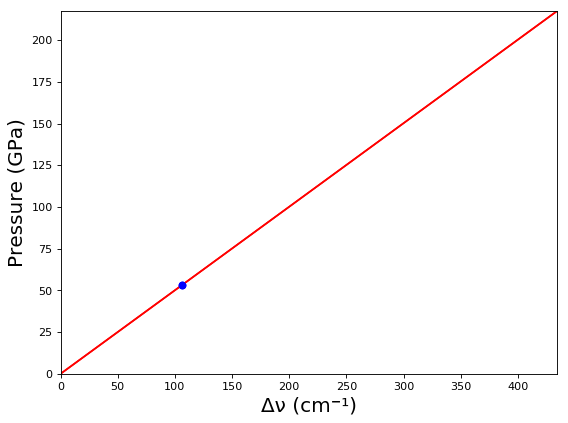

In [4]:
import matplotlib.pyplot as plt
from pylab import *
import time
ion() # turn interactive mode on

A, B = 1904, 9.500

def ruby_scale(scale1):
    global A, B
    if scale1 == 2:
        #Data from: Dewaele et al. (2004) 10.1103/PhysRevB.70.094112
        A, B = 1904, 9.500
        initialise2()
    if scale1 == 3:
        #Data from: Mao et al. (1986)
        A, B = 1904, 7.665
        initialise2()

def R1_0(R1_0_value):
    R1_0 = (float(R1_0_box.value[0:-3]))
    
def ruby(R1):
    R1_0,V1_0,R1,V1=get_boxes()
    delta=R1-R1_0
    ruby_P=A/B*((1+delta/R1_0)**B-1)
    P_slider2.value=ruby_P
    raman_slider.value=(ruby_P*(1/0.501))+V1_0
    cal_plot(V1,V1_0)

def raman_scale(scale2):
    return scale2

def V1_0(V1_0_value):
    V1_0 = (float(V1_0_box.value[0:-5]))

def raman(V1):
    R1_0,V1_0,R1,V1=get_boxes()
    raman_P=0.501*(V1-V1_0)
    P_slider2.value=raman_P
    ruby_slider.value=R1_0*(((B*((A/B)+raman_P))/A)**(1/B))
    cal_plot(V1,V1_0)
    
def get_boxes():
    R1_0   = (float(R1_0_box.value[0:-3]))
    V1_0   = (float(V1_0_box.value[0:-5]))
    R1     = ruby_slider.value
    V1     = raman_slider.value
    return (R1_0,V1_0,R1,V1)

def initialise2():
    R1_0,V1_0,R1,V1=get_boxes()
    ruby_slider.max    = 750
    ruby_slider.value  = R1_0
    ruby_slider.min    = R1_0
    P_slider2.max      = A/B*((1+(ruby_slider.max-R1_0)/R1_0)**B-1)
    P_slider2.value    = 0
    raman_slider.max   = ((P_slider2.max*(1/0.501))+V1_0)
    raman_slider.value = V1_0
    raman_slider.min   = V1_0
    
def cal_plot(V1,V1_0):
    R1_0,V1_0,R1,V1=get_boxes()    
    dV = V1-V1_0
    dV_range = np.arange(0., (raman_slider.max-V1_0), 0.2)
    figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    line1, line2, = plot(dV_range, dV_range*0.501, 'r-', dV, dV*0.501,  'bo')
    plt.ylim(0, P_slider2.max)
    plt.xlim(0, raman_slider.max-V1_0)
    ylab = 'Raman Pressure (GPa)'
    plt.ylabel('Pressure (GPa)', fontsize=18)
    plt.xlabel('Δν (cm⁻¹)', fontsize=18)
    
ruby_dropdown = widgets.Dropdown(options = {'Choose': 1, 'Hydrostatic - Dewaele et al. 2004': 2, 'Non-hydrostatic - Mao et al. 1986': 3},description='RUBY:',layout=Layout(width='35%'))
raman_dropdown = widgets.Dropdown(options = {'Walter et al. 2014': 1},description='RAMAN:',layout=Layout(width='35%'),disabled=True)

R1_0_box = widgets.Text(value='694.2 nm',disabled=False,text_color='green',background_color='green',layout=Layout(width='18%'),description='R1 λ₀:')
V1_0_box = widgets.Text(value='1332 cm⁻¹',disabled=False,text_color='green',background_color='green',layout=Layout(width='18%'),description='D ν₀:')

ruby_slider = widgets.FloatSlider(min=694.2, max=750, step=0.01, value=694.2, description='R1 λ:',slider_color='green',layout=Layout(width='52.5%'),continuous_update=False)            
raman_slider = widgets.FloatSlider(min=1332, max=1600, step=0.1, value=1332, description='001 ν:',slider_color='green',layout=Layout(width='52.5%'),continuous_update=False)            

P_slider2 = widgets.FloatSlider(min=0, max=200, step=0.1, value=0, description='P in GPa:',slider_color='green',layout=Layout(width='100%'),disabled=True)            

w3=widgets.interactive(ruby_scale,scale1=ruby_dropdown)
w4=widgets.interactive(raman_scale,scale2=raman_dropdown)
w5=widgets.interactive(R1_0,R1_0_value=R1_0_box)
w6=widgets.interactive(V1_0,V1_0_value=V1_0_box)
w7=widgets.interactive(ruby,R1=ruby_slider)
w8=widgets.interactive(raman,V1=raman_slider)

ruby_dropdown.value = 1
initialise2()
cal_plot(raman_slider.value,float(V1_0_box.value[0:-5]))
VBox([HBox([ruby_dropdown,R1_0_box,ruby_slider]),HBox([raman_dropdown,V1_0_box,raman_slider]),HBox([P_slider2])])